# Data preprocssing for covid-19 dataset
https://ourworldindata.org/covid-vaccinations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
covid_vaccination_world_data = pd.read_csv("C:/Users/rutub/OneDrive/Desktop/Fall 2023/Comp4710/COMP4710-World-Vaccine-Adverse-Reactions/owid-covid-data.csv", encoding='latin-1')
covid_vaccination_data = pd.read_csv("C:/Users/rutub/OneDrive/Desktop/Fall 2023/Comp4710/COMP4710-World-Vaccine-Adverse-Reactions/covid-19_vaccination_US_Data_2020-2022.csv", encoding='latin-1')
print(covid_vaccination_data.columns.tolist())
# usa_vaccination_data = covid_vaccination_data[covid_vaccination_data['iso_code'] == 'USA']
# usa_vaccination_data = usa_vaccination_data[usa_vaccination_data['date'] >= '2020-01-01']
# usa_vaccination_data = usa_vaccination_data[usa_vaccination_data['date'] <= '2022-12-31']

# output_file_name = "covid-19_vaccination_US_Data_2020-2022.csv"
# usa_vaccination_data.to_csv(output_file_name, index=False)

# print(usa_vaccination_data.shape)

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

## Total cases in the world

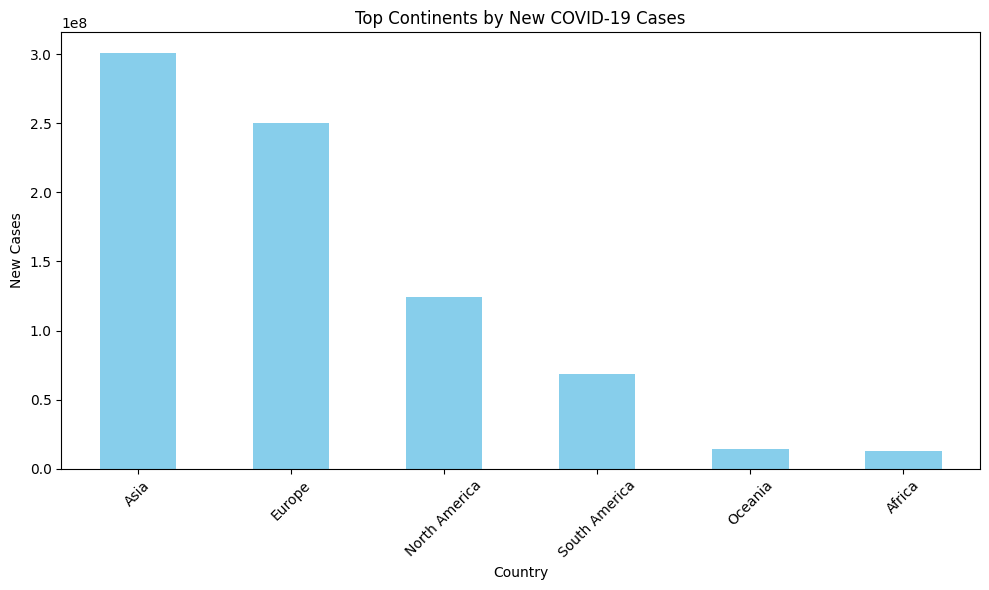

In [4]:
top_countries = covid_vaccination_world_data.groupby('continent')['new_cases'].sum().nlargest(10)  # Top 10 countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top Continents by New COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Showing total deaths using pie chart

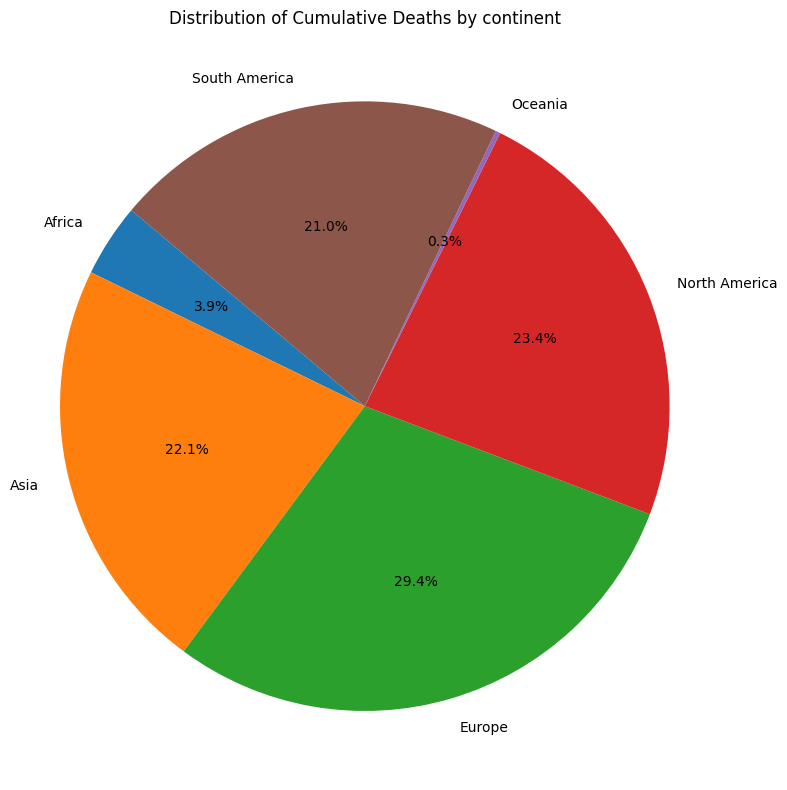

In [5]:
region_deaths = covid_vaccination_world_data.groupby('continent')['total_deaths'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_deaths, labels=region_deaths.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cumulative Deaths by continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

## Visualization of Covid-19 data grouping total Covid-19 cases and total Vaccination doses

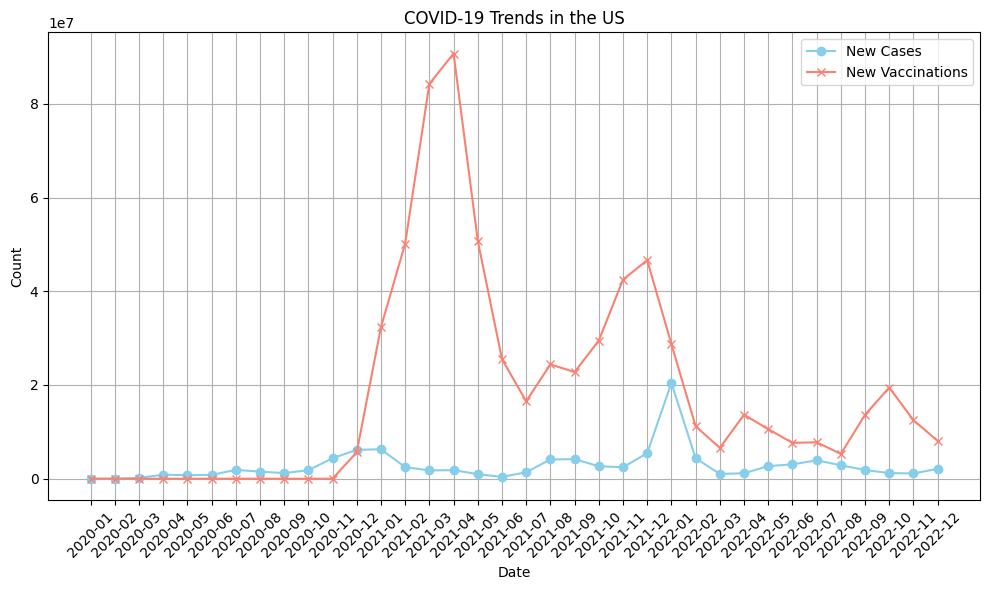

In [6]:
covid_vaccination_data['date'] = pd.to_datetime(covid_vaccination_data['date'])
covid_vaccination_data['Month'] = covid_vaccination_data['date'].dt.to_period('M')

monthly_data = covid_vaccination_data.groupby('Month')[['new_cases', 'new_vaccinations', 'new_deaths']].sum()
monthly_data = monthly_data.reset_index() 

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'].astype(str), monthly_data['new_cases'], label='New Cases', color='skyblue', marker='o')
plt.plot(monthly_data['Month'].astype(str), monthly_data['new_vaccinations'], label='New Vaccinations', color='salmon', marker='x')
# plt.plot(monthly_data['Month'].astype(str), monthly_data['new_deaths'], label='New Deaths', color='blue', marker='+')
plt.title('COVID-19 Trends in the US')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualization of Covid-19 total deaths in period of 2020-01-01 to 2022-12-31

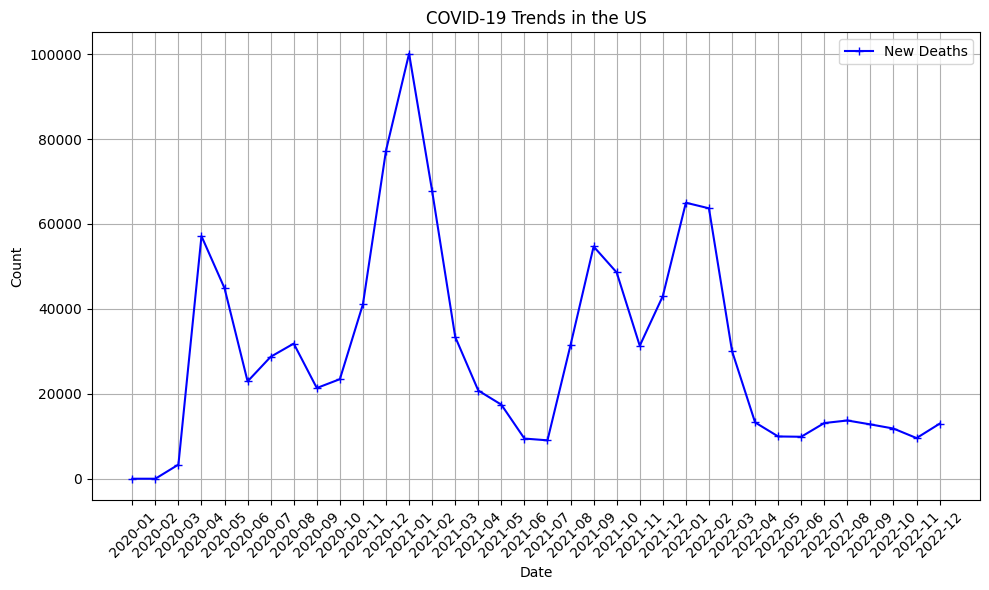

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'].astype(str), monthly_data['new_deaths'], label='New Deaths', color='blue', marker='+')
plt.title('COVID-19 Trends in the US')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
